<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Segment_Ajuste_mar_2021/Fig_05_BIG_Segmentation_mar_31_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 4.2MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 78.58 MiB | 41.52 MiB/s, done.
Resolving deltas: 100% (144/144), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)


In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     166   89.440842   87.931770  ...   80.023659   44.078236   64.499496
1     140   45.200001   18.160000  ...    2.800000    1.080000    0.000000
2     111   70.809105   74.150230  ...   91.059822   89.783707   92.583969
3     109   65.410065   63.933254  ...  166.189468  182.586731  196.330185
4     134   27.521721   30.510361  ...    0.900200    0.549788    0.520829
5     168  104.027779  112.861115  ...    2.972222    1.638889    1.250000
6     126   79.037048   82.888893  ...   80.271606   84.148148   85.358032
7     112   91.937500   83.875000  ...   67.562500   71.125000   72.625000
8     193  113.915024  122.194443  ...   18.625360   15.980350   10.310559
9     113  125.002197  125.911743  ...   40.342312   41.296108   40.374813
10    100   65.409599   74.249596  ...   55.643200   69.859200   79.708801
11    110  139.074707  141.177185  ...   34.265781   34.851238   35.263802
12    171   54.971924   5

In [11]:
del df['Width']
print(df)

           0           1           2    ...         781         782         783
0    89.440842   87.931770   85.730293  ...   80.023659   44.078236   64.499496
1    45.200001   18.160000   13.000000  ...    2.800000    1.080000    0.000000
2    70.809105   74.150230   78.191544  ...   91.059822   89.783707   92.583969
3    65.410065   63.933254   64.049408  ...  166.189468  182.586731  196.330185
4    27.521721   30.510361   37.993984  ...    0.900200    0.549788    0.520829
5   104.027779  112.861115  112.305557  ...    2.972222    1.638889    1.250000
6    79.037048   82.888893   86.148155  ...   80.271606   84.148148   85.358032
7    91.937500   83.875000   89.375000  ...   67.562500   71.125000   72.625000
8   113.915024  122.194443  129.750946  ...   18.625360   15.980350   10.310559
9   125.002197  125.911743  119.781815  ...   40.342312   41.296108   40.374813
10   65.409599   74.249596   79.161606  ...   55.643200   69.859200   79.708801
11  139.074707  141.177185  147.135193  

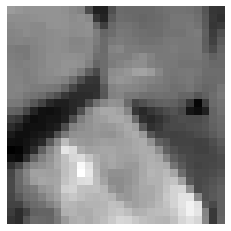

In [12]:
Size=28
#qual_img=7
#L = Width[qual_img]
data=np.array(df.iloc[0,:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.axis('off')
plt.imshow(Foto, cmap = "gray")

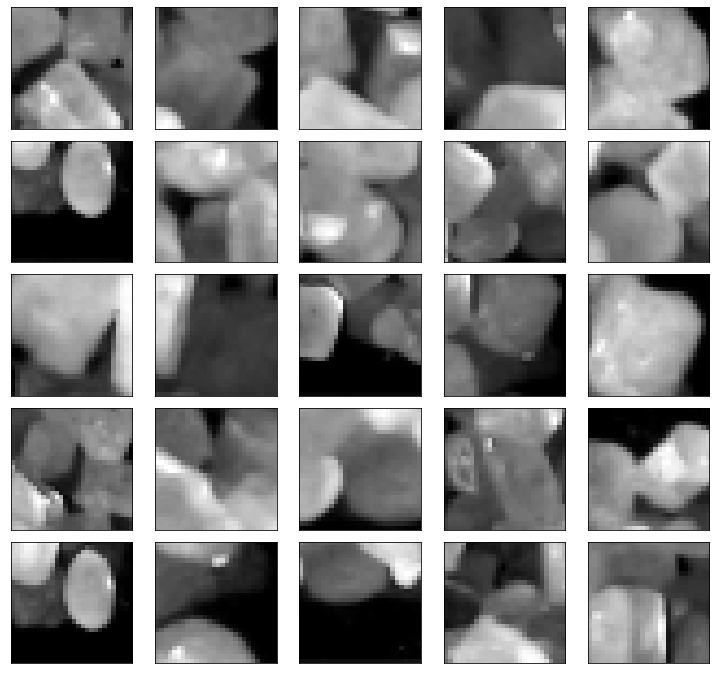

In [13]:
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(df.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)
